In [ ]:
with open('names.txt', 'r') as f:
    lines = f.readlines()
    coco_names = []
    for line in lines:
        name = line.replace("\n","")
        coco_names.append(name)
        

In [25]:
import cv2
import numpy as np 
from ultralytics import YOLO
import matplotlib.pyplot as plt
import random
random.seed(42)

In [42]:

def draw_predictions(img, model):
    results = model.predict(source=img)
    results = results[0].cpu().numpy()

    COLORS = []
    blue, green, red = 0, 0, 0

    FONT_SIZE = int((img.shape[0]*img.shape[1])/(3*(10)**6))

    if FONT_SIZE < 1: FONT_SIZE = 1
    
    print(img.shape[0]*img.shape[1])
    print(f"Font size : {FONT_SIZE}")

    with open('names.txt', 'r') as f:
        lines = f.readlines()
        coco_names = []
        for line in lines:
            name = line.replace("\n","")
            coco_names.append(name)
            blue = random.randrange(0, 255, 5)
            green = random.randrange(0, 255, 5)
            red = random.randrange(0, 255, 5)
            COLORS.append((blue, green, red))
    # print(coco_names)
    boxes = results.boxes

    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        print(x1, y1, x2, y2)

        cls_id = int(box.cls.tolist()[0])

        # Define random color.
        blue = random.randrange(0, 255, 10)
        green = random.randrange(0, 255, 10)
        red = random.randrange(0, 255, 10)

        COLOR = COLORS[cls_id]
        class_name = coco_names[cls_id]
        print(class_name)

        (label_width, label_height), baseline = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_COMPLEX, 2, 2)

        cv2.putText(img, class_name, (x1, y1 - int(0.2*label_height)), cv2.FONT_HERSHEY_COMPLEX, FONT_SIZE, COLOR, 1)
        cv2.rectangle(img, (x1, y1), (x2, y2), COLOR, thickness=2, lineType=cv2.LINE_AA)

    return img

Ultralytics YOLOv8.0.41 🚀 Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5913MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

0: 448x640 1 bowl, 1 chair, 1 couch, 2 potted plants, 3 vases, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


1094400
Font size : 1
557 440 993 656
sofa
403 449 515 593
chair
49 490 143 570
pottedplant
544 354 623 445
pottedplant
68 533 123 570
vase
15 641 81 687
bowl
117 456 159 502
vase
585 508 622 555
vase


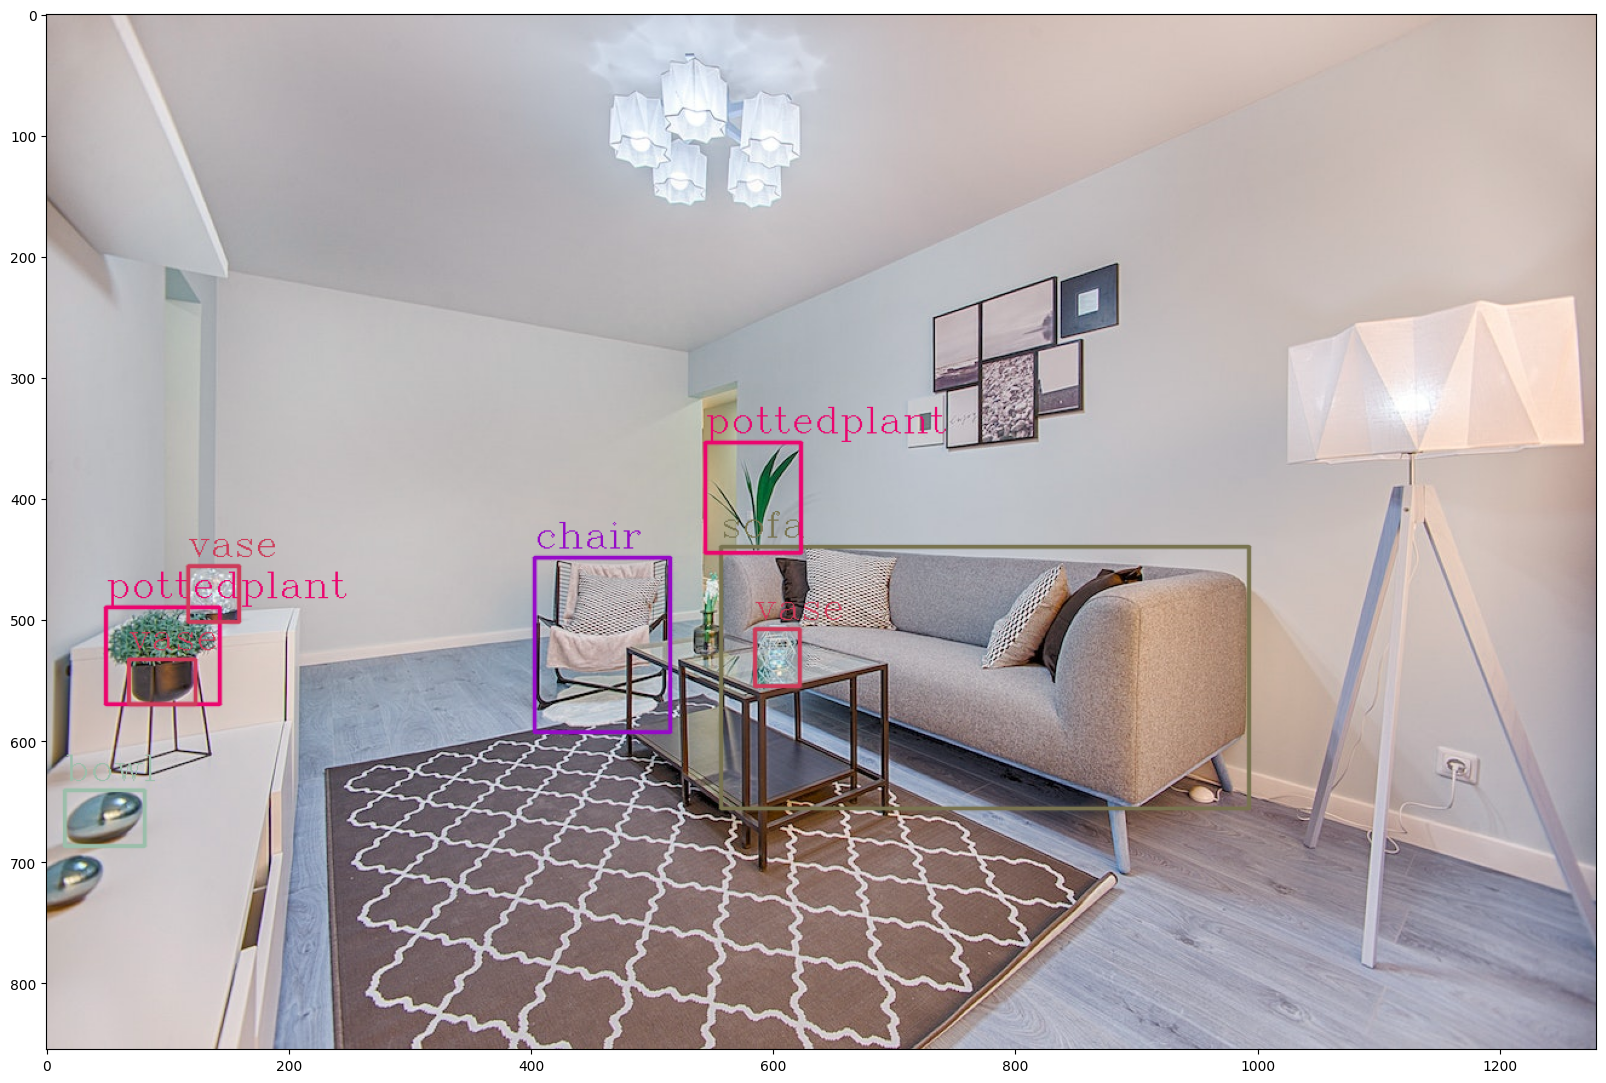

In [43]:
image = cv2.imread('test-img.jpg')
model = YOLO('yolov8l.pt')
out_img = draw_predictions(image, model)
plt.figure(figsize=(20,14))
plt.imshow(out_img);